In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Datacleaning
- Remove column loan_id
- Check duplicates, None
- Column education; Replace; Graduate:1, Not Gratuate:0
- Column self_employed; Replace; Yes:1, No:0
- Column loan_status; Replace; Approved:1, Rejected:0

In [5]:
df.columns=df.columns.str.strip()

In [6]:
df=df.drop(columns='loan_id')

In [7]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df['education'].value_counts() #Graduate 2144, Not Graduate 2125
df['self_employed'].value_counts() #Yes 2150, No 2119
df['education']=df['education'].str.strip().map({'Graduate':1, 'Not Graduate':0})
df['self_employed']=df['self_employed'].str.strip().map({'Yes':1, 'No':0})
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [10]:
df['loan_status'].value_counts() # Approved 2656, Rejected 1613
df['loan_status']=df['loan_status'].str.strip().map({'Approved':1, 'Rejected':0})
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Visualization
- Correlation heatmap
- Distribution plot
- Boxplot; Loan Amount, Annual income and Credit Score Distirbution by Loan Status
- FacetGrid over Credit Score Distribution Based on Loan Status
- Jointplot, Credit Score and Loan Status


Text(0.5, 1.0, 'Heatmap over correlationmatrix for dataset loan_prediction')

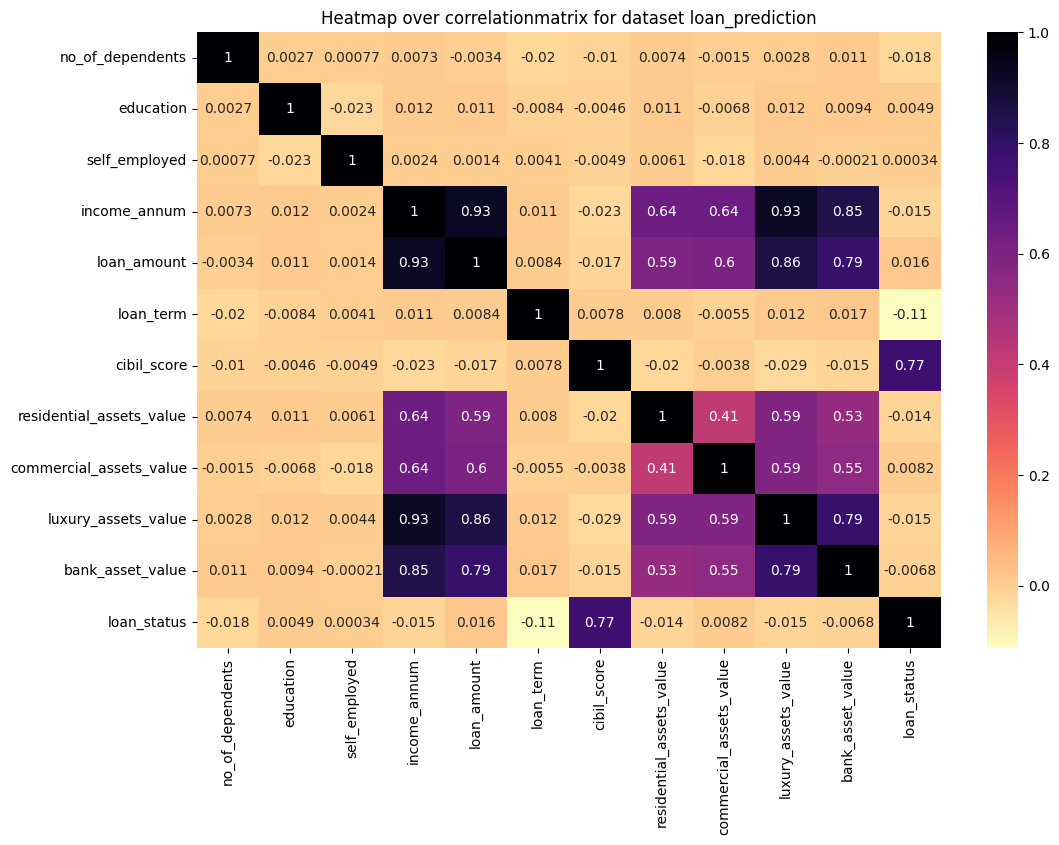

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='magma_r', annot=True)
plt.title('Heatmap over correlationmatrix for dataset loan_prediction')

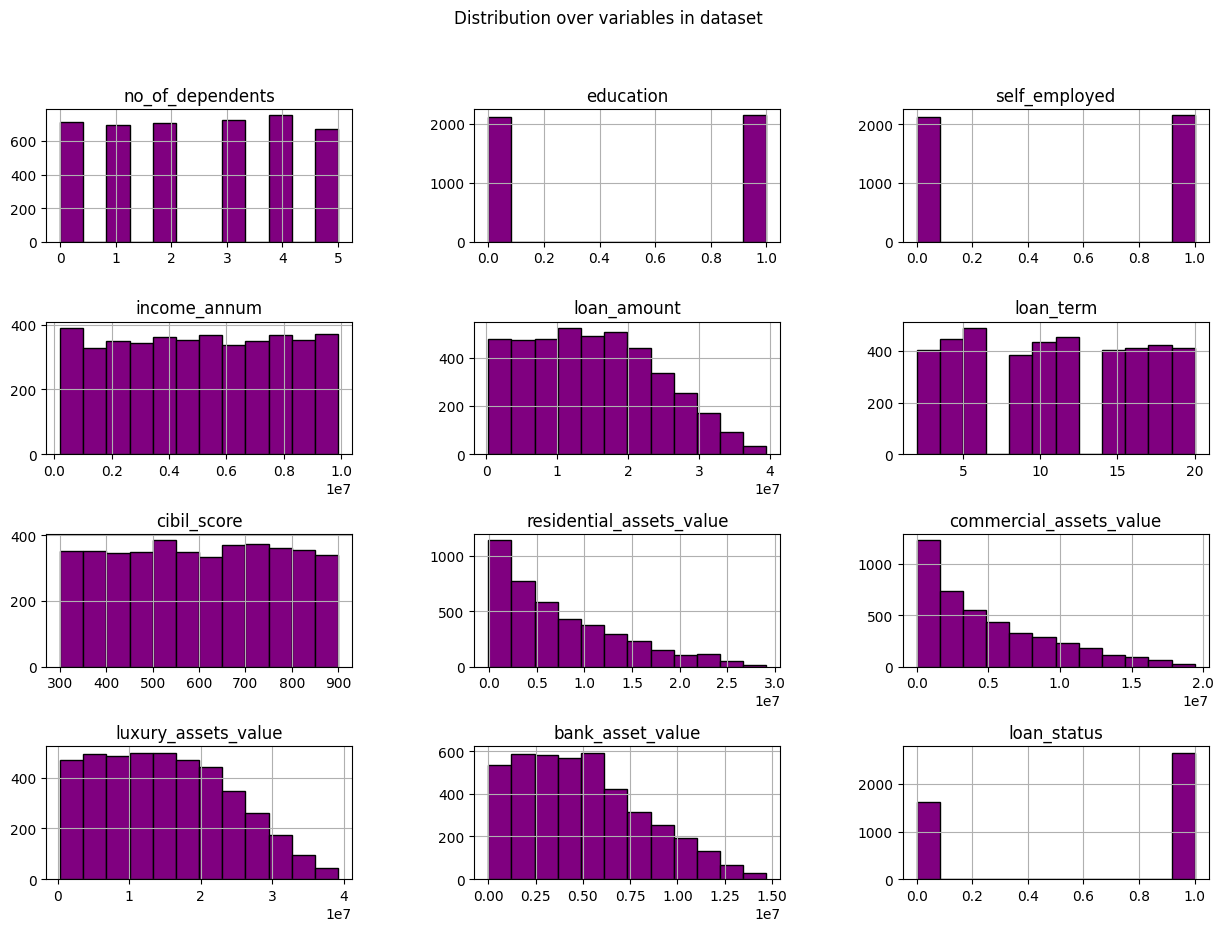

In [13]:
# Distribution plot 
df.hist(bins=12, figsize=(15,10), color='purple', edgecolor='black')
plt.suptitle('Distribution over variables in dataset')
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

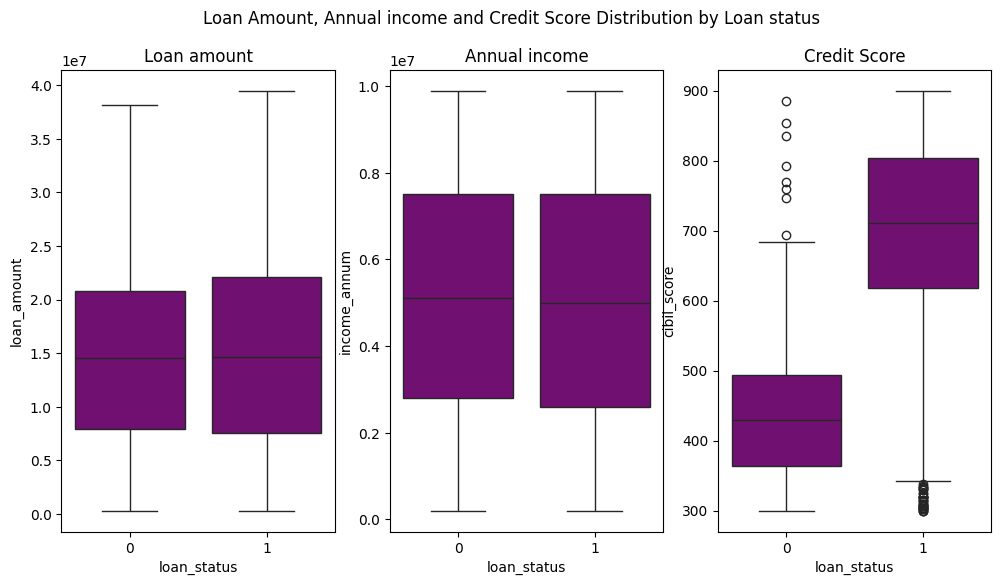

In [14]:
#Boxplot for Loan Amount, Annual income and Credit Score Distirbution by Loan Status
fig, axes=plt.subplots(1,3, figsize=(12,6))
sns.boxplot(data=df, x='loan_status', y='loan_amount', ax=axes[0], color='purple')
axes[0].set_title('Loan amount')

sns.boxplot(data=df, x='loan_status', y='income_annum', ax=axes[1], color='purple')
axes[1].set_title('Annual income')

sns.boxplot(data=df, x='loan_status', y='cibil_score', ax=axes[2], color='purple')
axes[2].set_title('Credit Score')

plt.suptitle('Loan Amount, Annual income and Credit Score Distribution by Loan status')
plt.show()

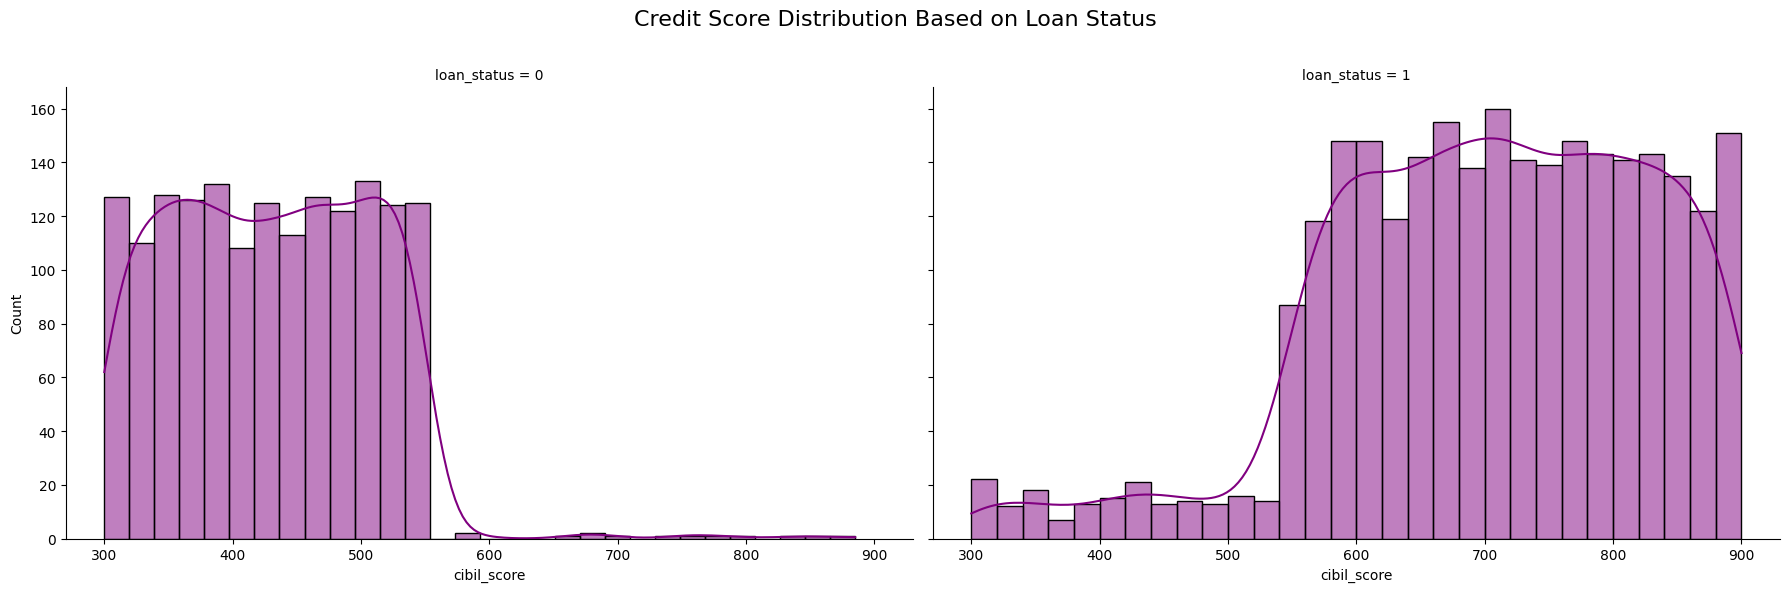

In [15]:
#FacetGrid over Credit Score Distribution Based on Loan Status
sns.FacetGrid(df, col='loan_status', height=6, aspect=1.5).map(
    sns.histplot, 'cibil_score', bins=30, kde=True, color='purple'
)

# Justera layouten och lägg till en övergripande titel
plt.subplots_adjust(top=0.85)
plt.suptitle('Credit Score Distribution Based on Loan Status', fontsize=16)

plt.show()

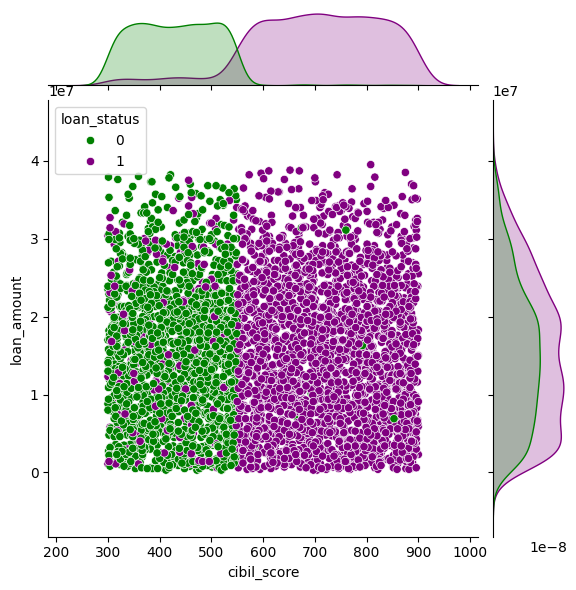

In [16]:
#Jointplot, Credit Score and Loan Status
sns.jointplot(x='cibil_score', 
              y='loan_amount', 
              data=df, 
              kind='scatter', 
              hue='loan_status',
              palette={1:'purple', 0:'green'})
plt.show()

## Statistics
- loan_status and loan_amount, income_annum, cibil_score. Shapiro-Wilks and Mann-Whitney U-test
- no_of_dependants and loan_amount, Shapiro-Wilks test and Kruskal-Wallis
- loan_term and loan_status, Shapiro-Wilks test and Mann-Whitney U-test
- cibil_score grouped and loan_amount, income_annum, Shapiro-Wilks test and Kruskal-Wallis

### loan_status and loan_amound, Shapiro and Mann-Whitney

In [17]:
from scipy.stats import shapiro
approved=df[df['loan_status']==1]['loan_amount']
rejected=df[df['loan_status']==0]['loan_amount']
stat,p = shapiro(approved)
print(f'Shapiro-Wilk Test for loan_amount, loan_status: Approved\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

stat,p = shapiro(rejected)
print(f'Shapiro-Wilk Test for loan_amount, loan_status: Rejected\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

Shapiro-Wilk Test for loan_amount, loan_status: Approved
Stats 0.969  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen
Shapiro-Wilk Test for loan_amount, loan_status: Rejected
Stats 0.976  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen


In [18]:
from scipy.stats import mannwhitneyu
u_stat, p_val= mannwhitneyu(approved, rejected)
print(f'Mann-Whitney U-test: u_stat{u_stat:.3f}, p-value{p_val:.3f}')
if p_val> 0.05:
    print('Inga statistiskt signifikanta skillnader mellan grupperna')
else:
    print('Statistiskt signifikanta skillnader mellan grupperna')

Mann-Whitney U-test: u_stat2174035.000, p-value0.413
Inga statistiskt signifikanta skillnader mellan grupperna


### loan_status and income_annum, Shapiro and Mann-Whitney

In [19]:
approved=df[df['loan_status']==1]['income_annum']
rejected=df[df['loan_status']==0]['income_annum']
stat,p = shapiro(approved)
print(f'Shapiro-Wilk Test for income_annum, loan_status: Approved\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

stat,p = shapiro(rejected)
print(f'Shapiro-Wilk Test for income_annum, loan_status: Rejected\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

Shapiro-Wilk Test for income_annum, loan_status: Approved
Stats 0.954  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen
Shapiro-Wilk Test for income_annum, loan_status: Rejected
Stats 0.960  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen


In [20]:
u_stat, p_val= mannwhitneyu(approved, rejected)
print(f'Mann-Whitney U-test: u_stat{u_stat:.3f}, p-value{p_val:.3f}')
if p_val> 0.05:
    print('Inga statistiskt signifikanta skillnader mellan grupperna')
else:
    print('Statistiskt signifikanta skillnader mellan grupperna')

Mann-Whitney U-test: u_stat2103655.000, p-value0.325
Inga statistiskt signifikanta skillnader mellan grupperna


### loan_status and cibil_score, shapiro and Mann-Whitney

In [21]:
approved=df[df['loan_status']==1]['cibil_score']
rejected=df[df['loan_status']==0]['cibil_score']
stat,p = shapiro(approved)
print(f'Shapiro-Wilk Test for cibil_score, loan_status: Approved\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

stat,p = shapiro(rejected)
print(f'Shapiro-Wilk Test for cibil_score, loan_status: Rejected\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

Shapiro-Wilk Test for cibil_score, loan_status: Approved
Stats 0.959  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen
Shapiro-Wilk Test for cibil_score, loan_status: Rejected
Stats 0.946  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen


In [22]:
u_stat, p_val= mannwhitneyu(approved, rejected)
print(f'Mann-Whitney U-test: u_stat{u_stat:.3f}, p-value{p_val:.3f}')
if p_val> 0.05:
    print('Inga statistiskt signifikanta skillnader mellan grupperna')
else:
    print('Statistiskt signifikanta skillnader mellan grupperna')

Mann-Whitney U-test: u_stat4110508.000, p-value0.000
Statistiskt signifikanta skillnader mellan grupperna


In [23]:
print("\nStatistics for loan_status Approved, cibil_score:")
print(f"Median: {approved.median():.2f}")
print(f"Min: {approved.min():.2f}")
print(f"Max: {approved.max():.2f}")

print("\nStatistics for loan_status Rejected, cibil_score:")
print(f"Median: {rejected.median():.2f}")
print(f"Min: {rejected.min():.2f}")
print(f"Max: {rejected.max():.2f}")


Statistics for loan_status Approved, cibil_score:
Median: 711.00
Min: 300.00
Max: 900.00

Statistics for loan_status Rejected, cibil_score:
Median: 429.00
Min: 300.00
Max: 885.00


### loan_status and loan_term, Shapiro and Mann-Whitney

In [24]:
approved=df[df['loan_status']==1]['loan_term']
rejected=df[df['loan_status']==0]['loan_term']
stat,p = shapiro(approved)
print(f'Shapiro-Wilk Test for loan_term, loan_status: Approved\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

stat,p = shapiro(rejected)
print(f'Shapiro-Wilk Test for loan_term, loan_status: Rejected\nStats {stat:.3f}  P-value {p:.3f}')
if p > 0.05:
    print('Datan är normalfördelad,förkasta inte nollhypotesen')
else:
    print('Datan är inte normalfördelad, förkasta nollhypotesen')

Shapiro-Wilk Test for loan_term, loan_status: Approved
Stats 0.924  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen
Shapiro-Wilk Test for loan_term, loan_status: Rejected
Stats 0.948  P-value 0.000
Datan är inte normalfördelad, förkasta nollhypotesen


In [25]:
u_stat, p_val= mannwhitneyu(approved, rejected)
print(f'Mann-Whitney U-test: u_stat{u_stat:.3f}, p-value{p_val:.3f}')
if p_val> 0.05:
    print('Inga statistiskt signifikanta skillnader mellan grupperna')
else:
    print('Statistiskt signifikanta skillnader mellan grupperna')

Mann-Whitney U-test: u_stat1850883.500, p-value0.000
Statistiskt signifikanta skillnader mellan grupperna


In [26]:
print("\nStatistics for loan_status Approved:")
print(f"Median: {approved.median():.2f}")
print(f"Min: {approved.min():.2f}")
print(f"Max: {approved.max():.2f}")

print("\nStatistics for loan_status Rejected:")
print(f"Median: {rejected.median():.2f}")
print(f"Min: {rejected.min():.2f}")
print(f"Max: {rejected.max():.2f}")


Statistics for loan_status Approved:
Median: 10.00
Min: 2.00
Max: 20.00

Statistics for loan_status Rejected:
Median: 12.00
Min: 2.00
Max: 20.00


### no_of_dependants and loan_amount, Shapiro and Kruskal-Wallis

In [27]:
groups = [df[df['no_of_dependents'] == i]['loan_amount'] for i in range(6)]
for i, group in enumerate(groups):
    stat, p = shapiro(group)
    print(f"Group {i}: Shapiro-Wilk statistic={stat:.3f}, p-value={p:.3f}")

    # Tolka resultaten
    if p > 0.05:
        print(f"Group {i}: Data är normalfördelad\n")
    else:
        print(f"Group {i}: Data är inte normalfördelad\n")

Group 0: Shapiro-Wilk statistic=0.970, p-value=0.000
Group 0: Data är inte normalfördelad

Group 1: Shapiro-Wilk statistic=0.965, p-value=0.000
Group 1: Data är inte normalfördelad

Group 2: Shapiro-Wilk statistic=0.975, p-value=0.000
Group 2: Data är inte normalfördelad

Group 3: Shapiro-Wilk statistic=0.974, p-value=0.000
Group 3: Data är inte normalfördelad

Group 4: Shapiro-Wilk statistic=0.967, p-value=0.000
Group 4: Data är inte normalfördelad

Group 5: Shapiro-Wilk statistic=0.974, p-value=0.000
Group 5: Data är inte normalfördelad



In [28]:
from scipy.stats import kruskal

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test: statistic={stat:.3f}, p-value={p:.3f}")

if p > 0.05:
    print("Ingen signifikant skillnad mellan grupperna")
else:
    print("Det finns en signifikant skillnad mellan grupperna")

Kruskal-Wallis test: statistic=3.523, p-value=0.620
Ingen signifikant skillnad mellan grupperna


### cibil_score grouped and loan_amount, income_annum, Shapiro and Kruskal-Wallis

In [29]:
df['cibil_group']=pd.cut(df['cibil_score'], bins=[0,600, 700,800, 900], labels=['Low', 'Medium', 'High', 'Very High'])
variables= ['loan_amount', 'income_annum']
for var in variables:
    print(f'\nCheck if data is normalized distributed for {var}:')
    for group in df['cibil_group'].unique():
        group_data= df[df['cibil_group']== group][var]
        stat,p= shapiro(group_data)
        print(f'Group: {group}  Shapiro-Wilks test: p-value={p:.3f}')
        if p>0.05:
            print(f'{var} in {group} is normally distributed')
        else:
            print(f'{var} in {group} is not normally distributed') 


Check if data is normalized distributed for loan_amount:
Group: High  Shapiro-Wilks test: p-value=0.000
loan_amount in High is not normally distributed
Group: Low  Shapiro-Wilks test: p-value=0.000
loan_amount in Low is not normally distributed
Group: Medium  Shapiro-Wilks test: p-value=0.000
loan_amount in Medium is not normally distributed
Group: Very High  Shapiro-Wilks test: p-value=0.000
loan_amount in Very High is not normally distributed

Check if data is normalized distributed for income_annum:
Group: High  Shapiro-Wilks test: p-value=0.000
income_annum in High is not normally distributed
Group: Low  Shapiro-Wilks test: p-value=0.000
income_annum in Low is not normally distributed
Group: Medium  Shapiro-Wilks test: p-value=0.000
income_annum in Medium is not normally distributed
Group: Very High  Shapiro-Wilks test: p-value=0.000
income_annum in Very High is not normally distributed


In [30]:
for var in variables:
    groups=[df[df['cibil_group']==group][var] for group in df['cibil_group'].unique()]
    stat,p = kruskal(*groups)
    print(f'\nKruskal-Wallis test for {var}')
    print(f'Statistics: {stat:.3f}, p-value: {p:.3f}')
    if p> 0.05:
        print('No significant difference between groups')
    else:
        print('Significant difference between groups')


Kruskal-Wallis test for loan_amount
Statistics: 4.976, p-value: 0.174
No significant difference between groups

Kruskal-Wallis test for income_annum
Statistics: 5.144, p-value: 0.162
No significant difference between groups


## Logistic Regression Model

In [31]:
#first model, Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X=df[['no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

logreg=LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred=logreg.predict(X_test_scaled)

accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy Score {accuracy:.2f}\n')

conf_matrix=confusion_matrix(y_test,y_pred)
print(f'Confusion matrix:\n{conf_matrix}\n')

print(f'Classification Report:\n{classification_report(y_test,y_pred)}')

Accuracy Score 0.91

Confusion matrix:
[[277  41]
 [ 35 501]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



In [32]:
# Cross validation scores
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.2f}')

Cross-validated scores: [0.90922401 0.90922401 0.92679356 0.91800878 0.92972182]
Mean CV Score: 0.92


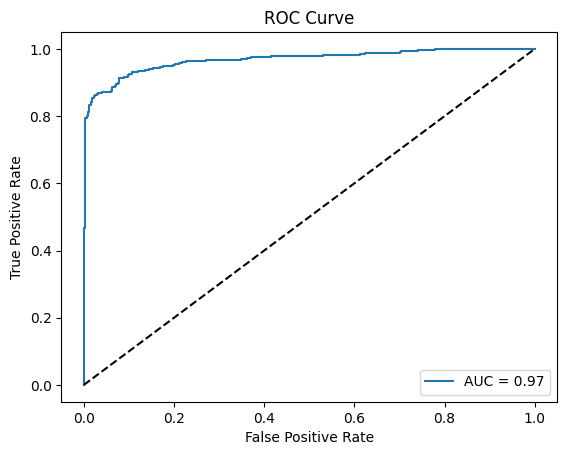

In [33]:
#ROC-curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = logreg.predict_proba(X_test_scaled)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
# Grid search for best params
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'], 
    'max_iter': [100, 200],
    'class_weight':['balanced', None]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f'\nBästa hyperparametrar: {best_params}')

best_logreg = LogisticRegression(**best_params)

best_logreg.fit(X_train_scaled, y_train)

y_pred_best = best_logreg.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'\nAccuracy Score med bästa hyperparametrar: {accuracy_best:.2f}')

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(f'\nConfusion matrix med bästa hyperparametrar:\n{conf_matrix_best}')
print(f'\nClassification Report med bästa hyperparametrar:\n{classification_report(y_test, y_pred_best)}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Bästa hyperparametrar: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}

Accuracy Score med bästa hyperparametrar: 0.91

Confusion matrix med bästa hyperparametrar:
[[297  21]
 [ 56 480]]

Classification Report med bästa hyperparametrar:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       318
           1       0.96      0.90      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [92]:
#save model
import joblib
joblib.dump(best_logreg, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']

## Decision Tree

Confusion matrix:
 [[302  16]
 [  7 529]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



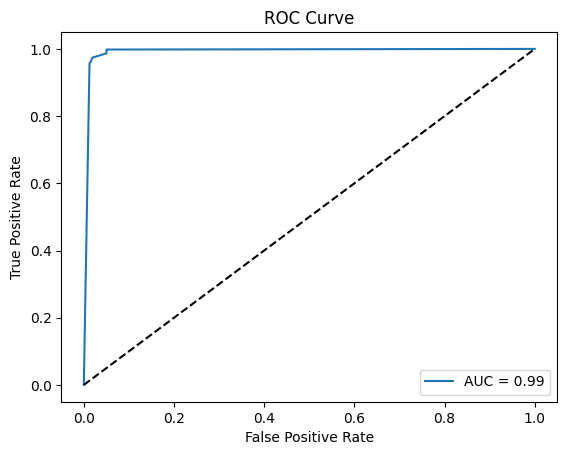

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#first decision tree
X=df[['no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_tree=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report=classification_report(y_test,y_pred)
print('Classification report:\n',class_report)

#ROC-curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model_tree.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy Score: 0.97
Confusion matrix:
 [[313   5]
 [ 18 518]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       318
           1       0.99      0.97      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



/Users/mariebayard/Documents/GitHub/loan_approval_prediction_dataset/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


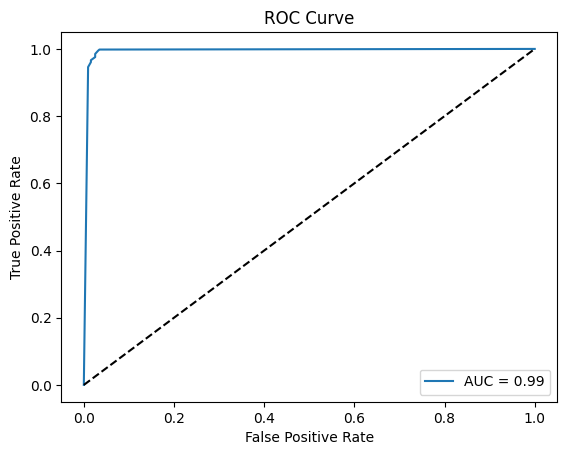

In [36]:
from sklearn.model_selection import GridSearchCV
# GridSearch
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 8, 12],
    'min_samples_leaf': [2, 5, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
#{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
model_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(model_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report=classification_report(y_test,y_pred)
print('Classification report:\n',class_report)

#ROC-curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = best_tree.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [37]:
#save model
import joblib
joblib.dump(best_tree, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']

In [38]:
#Train and test accuracy
y_train_pred = best_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

y_test_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.99
Test Accuracy: 0.97


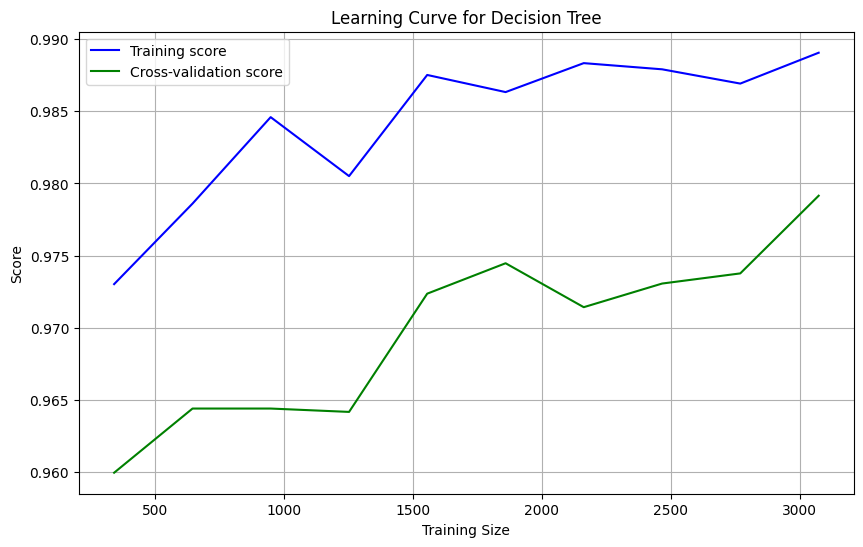

In [39]:
#Learning curve
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 0.9, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Random Forest

Confusion matrix:
 [[309   9]
 [ 10 526]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



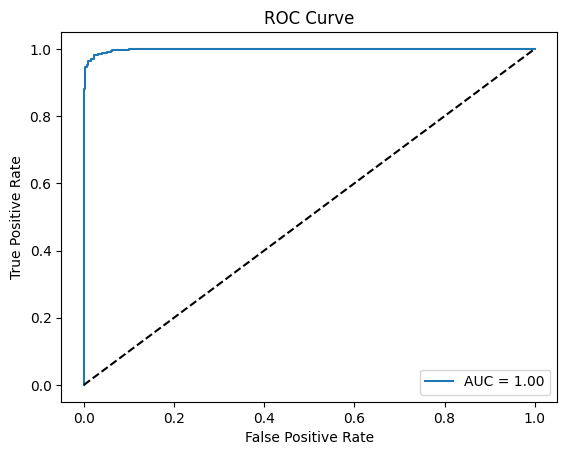

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#First Random Forest model
X=df[['no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_rf=RandomForestClassifier(n_estimators=100,
                                max_depth=10, 
                                min_samples_split=2, 
                                min_samples_leaf=3,
                                max_features='sqrt', 
                                class_weight='balanced', 
                                random_state=42)
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report=classification_report(y_test,y_pred)
print('Classification report:\n',class_report)

#ROC-curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model_rf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
#GridSearch
param_grid = {
    'n_estimators':[100,200],
    'max_depth': [5, 10, 12],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}
# Best params; {'class_weight': None, 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
model_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model_rf, param_grid, cv=5,n_jobs=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report=classification_report(y_test,y_pred)
print('Classification report:\n',class_report)

Best parameters: {'class_weight': None, 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Accuracy Score: 0.98
Confusion matrix:
 [[309   9]
 [  6 530]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [42]:
# Save model
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [43]:
#Train and test accuracy
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.98


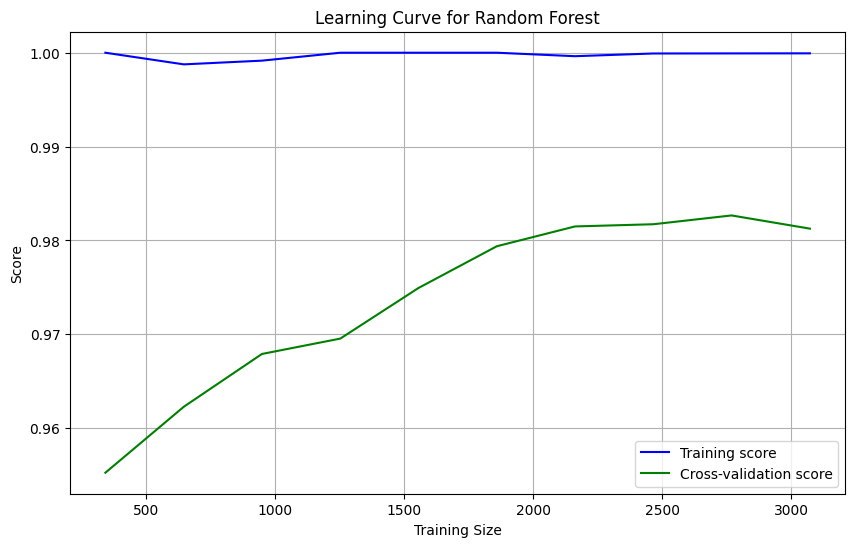

In [44]:
#Learning curve
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, train_sizes=np.linspace(0.1, 0.9, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

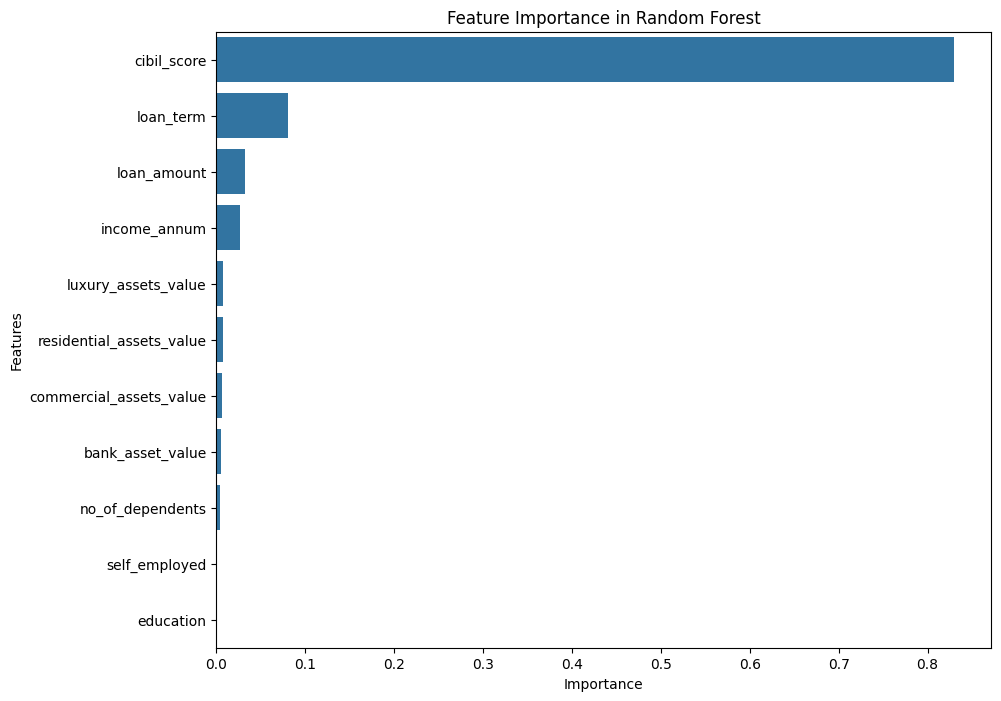

In [45]:
#feature importance
importances=best_rf.feature_importances_
features=X.columns
feature_importance_df=pd.DataFrame({'Features':features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Features', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

## XGBoost

Confusion matrix:
 [[306  12]
 [  4 532]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



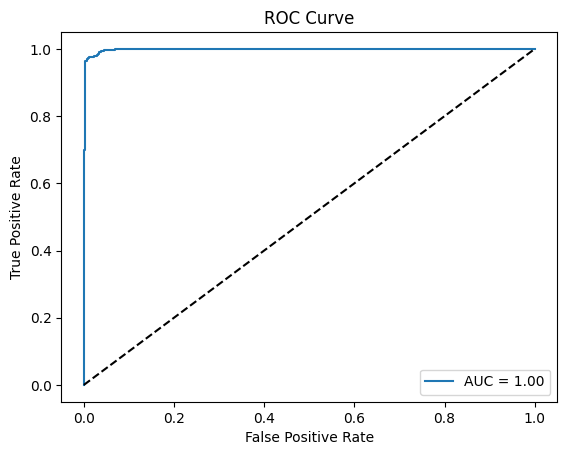

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

#first XGBoost model
X=df[['no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_xgb=XGBClassifier(n_estimators=100,
                        max_depth=10,
                        learning_rate=0.1,
                        random_state=42)
model_xgb.fit(X_train, y_train)
y_pred=model_xgb.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report=classification_report(y_test,y_pred)
print('Classification report:\n',class_report)

#ROC-curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model_xgb.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [47]:
#gridsearch
param_grid= {
    'n_estimators':[200,300],
    'max_depth': [6, 7, 8],
    'learning_rate':[0.06, 0.07],
    'subsample':[0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma':[0.3, 0.4],
    'alpha': [0, 0.001, 0.01],
    'lambda': [0, 0.5],
    'min_child_weight':[1,5,10]
}
model_xgb=XGBClassifier(random_state=42)

grid_search=GridSearchCV(model_xgb, param_grid, scoring='accuracy', cv=5, n_jobs=4)

grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification report:\n', class_report)
#{'alpha': 0.001, 'colsample_bytree': 0.8, 'gamma': 0.3, 'lambda': 0, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.7}

/Users/mariebayard/Documents/GitHub/loan_approval_prediction_dataset/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'alpha': 0.001, 'colsample_bytree': 0.7, 'gamma': 0.4, 'lambda': 0, 'learning_rate': 0.06, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Confusion matrix:
 [[309   9]
 [  7 529]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [48]:
#save model
import joblib
joblib.dump(best_model,'best_xgboost_model.pkl')

['best_xgboost_model.pkl']

In [49]:
#Train and test accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.98


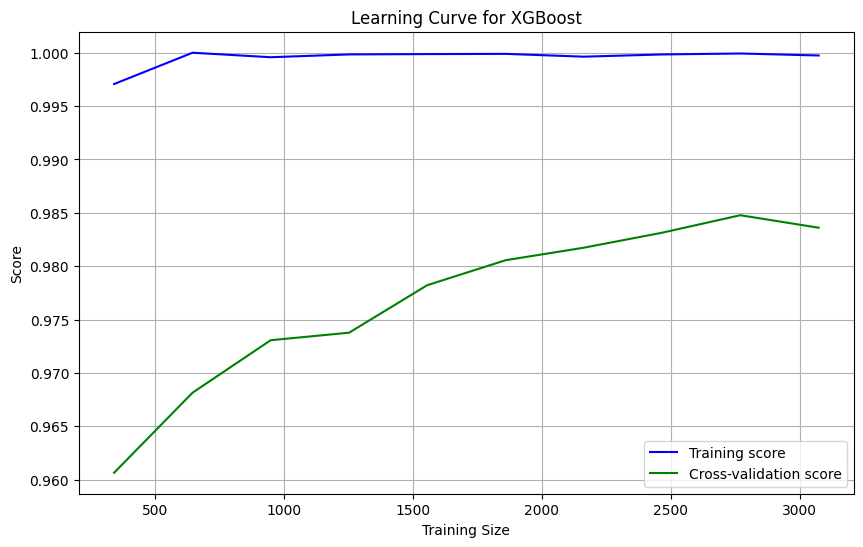

In [50]:
#Learning curve
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, train_sizes=np.linspace(0.1, 0.9, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

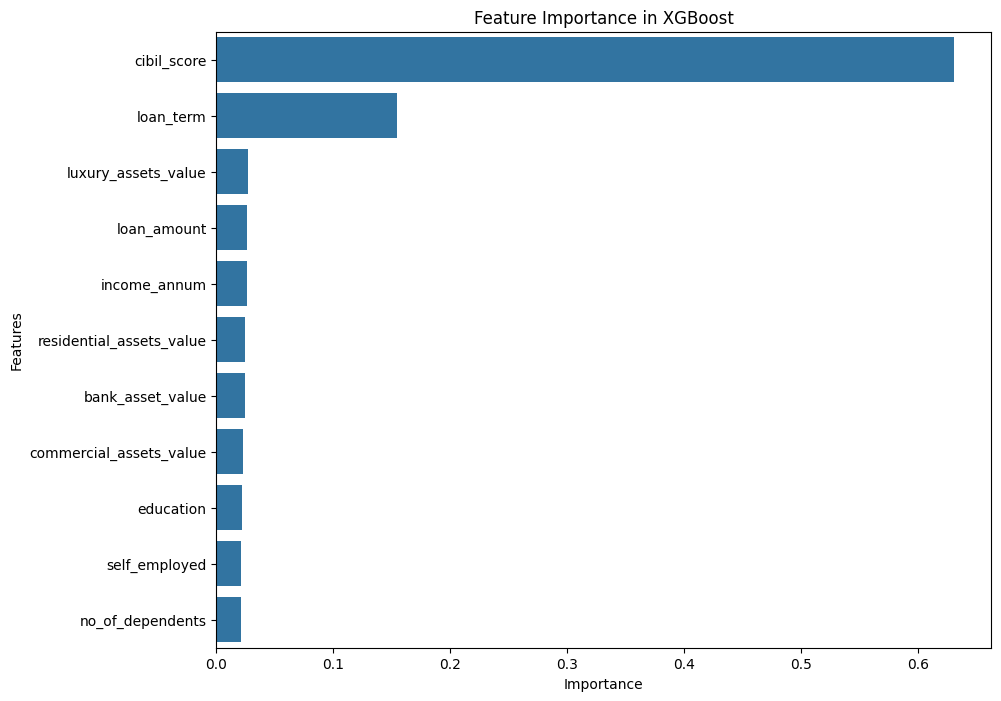

In [51]:
#feature importance
importances=best_model.feature_importances_
features=X.columns
feature_importance_df=pd.DataFrame({'Features':features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Features', data=feature_importance_df)
plt.title('Feature Importance in XGBoost')
plt.show()